In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.laser_types import *

from scipy.integrate import odeint, RK45, solve_ivp

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

In [2]:
from scipy.optimize import fsolve
laser = LaserModel()

-----------------REPORT------------------
Cavity Q:      3.4e+03
Active loss:   5680.3 MHz
Passive loss:  0.0 MHz
Cavity loss:   5680.3 MHz
Mirror loss:   51778.8 MHz
g_th:          1580.5 cm^(-1)
N_th:          3.77e18 cm^(-3)
I_th:          1.1 mA
eta_d:         90.1 %


In [3]:
Ix = np.linspace(0,10*laser.I_th,20)
tspan = [0,10e-9]
Pout,vST,Nx,t,N = laser.PI_current_sweep(Ix,tspan)

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\laser_types.py:164: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (log(Ne + self.N_s) - log(self.N_tr + self.N_s))
c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\laser_types.py:209: RuntimeWarning: overflow encountered in double_scalars
  dNdt = [laser.eta_i * current / laser.q / laser.V - (laser.A * Ne + laser.B * Ne ** 2 + laser.C * Ne ** 3) - laser.v_g_a * g * Np,


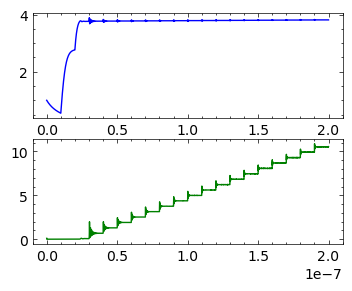

In [4]:
plt.figure()
plt.subplot(211)
plt.plot(t, N[0,:]/1e18, 'b', label='Carrier density 1e18 (cm^-3)')
plt.subplot(212)
plt.plot(t, N[1,:]/1e14, 'g', label='Photon density 1e14 (cm^-3)')

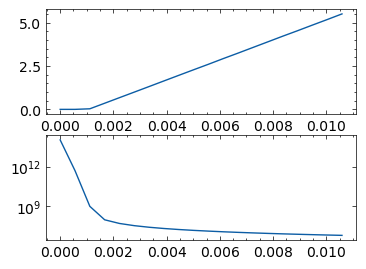

In [7]:
plt.figure()
plt.subplot(211)
plt.plot(Ix, Pout*1e3, label='Power (mW)')
plt.subplot(212)
plt.semilogy(Ix, vST, label='Linewidth (Hz)')

In [ ]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.xlabel('t')

In [ ]:
def pend(t, y, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
sol = solve_ivp(pend, [0, 10], y0, args=(b, c), rtol = 1e-4)
t = sol['t']
y = sol['y']
plt.plot(t, y[0,:], 'b', label='theta(t)')
plt.plot(t, y[1,:], 'g', label='omega(t)')
plt.xlabel('t')